<a href="https://colab.research.google.com/github/Sumit-321/My-work-samples/blob/main/Boosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Mounting with google drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
!pip install catboost

In [3]:
# Importing libraries
import pandas
import numpy
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score, accuracy_score, confusion_matrix, classification_report, roc_auc_score, f1_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn import svm
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Impoting the dataset
data = pandas.read_csv('/content/gdrive/My Drive/Datasets/Mushrooms.csv', engine='python')
# Shuffling dataset
data= data.sample(frac= 1)
# Shape of dataset
data.shape

(8124, 23)

In [5]:
# Names of columns in the dataframe
data.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [6]:
# Viewing 2 rows of dataframe
data.head(2)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
4646,p,x,f,y,f,f,f,c,b,p,e,b,k,k,n,b,p,w,o,l,h,v,d
7849,p,k,y,e,f,s,f,c,n,b,t,?,k,s,p,p,p,w,o,e,w,v,d


In [7]:
# Checking null values
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [8]:
# Checking duplicate values
data.duplicated().sum()

0

In [9]:
# Label encoding
for label in data.columns:
    data[label] = LabelEncoder().fit(data[label]).transform(data[label])

In [10]:
# Viewing 2 rows of dataframe
data.head(2)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
4646,1,5,0,9,0,2,1,0,0,7,0,1,1,1,4,0,0,2,1,2,1,4,0
7849,1,3,3,2,0,7,1,0,1,0,1,0,1,2,6,6,0,2,1,0,7,4,0


In [11]:
# Number of unique values in dataframe
data.nunique()

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

In [12]:
# Brief information about dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8124 entries, 4646 to 5153
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   class                     8124 non-null   int64
 1   cap-shape                 8124 non-null   int64
 2   cap-surface               8124 non-null   int64
 3   cap-color                 8124 non-null   int64
 4   bruises                   8124 non-null   int64
 5   odor                      8124 non-null   int64
 6   gill-attachment           8124 non-null   int64
 7   gill-spacing              8124 non-null   int64
 8   gill-size                 8124 non-null   int64
 9   gill-color                8124 non-null   int64
 10  stalk-shape               8124 non-null   int64
 11  stalk-root                8124 non-null   int64
 12  stalk-surface-above-ring  8124 non-null   int64
 13  stalk-surface-below-ring  8124 non-null   int64
 14  stalk-color-above-ring    8124 non-nu

In [13]:
# Dividing dataframe into independant and dependant sets
features= ['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat']
target= ['class']
x= data[features]
y= data[target]

In [14]:
# Dividing into training amd testing sets
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state= 1)
print('Training set shape : ', x_train.shape)
print('Testing set shape : ', x_test.shape)

Training set shape :  (6499, 22)
Testing set shape :  (1625, 22)


In [15]:
# Linear Regression
lr= LinearRegression()
lr.fit(x_train, y_train)
y_pred= lr.predict(x_test)
lr_accuracy= ( r2_score(y_test, y_pred) ) * 100
lr_accuracy1= lr_accuracy.round(decimals= 3)
print('Accuracy score with Linear Regression is : ', lr_accuracy1, '% .')

Accuracy score with Linear Regression is :  72.845 % .


In [16]:
# Decision tree classifier
dtc= DecisionTreeClassifier(criterion= 'entropy', max_depth= 1)
dtc.fit(x_train, y_train)
y_pred= dtc.predict(x_test)
dtc_accuracy= ( accuracy_score(y_test, y_pred) ) * 100
dtc_accuracy1= dtc_accuracy.round(decimals= 3)
print('Accuracy score with Decision tree classifier is : ', dtc_accuracy1, '% .')
dtc_f1_score= ( f1_score(y_test, y_pred) ) * 100
dtc_f1_score1= dtc_f1_score.round(decimals= 3)
print('F1 score with Decision tree classifier is : ', dtc_f1_score1, '% .')
print('Confusion matrix is : ','\n',confusion_matrix(y_test, y_pred))
print('Classification report is : ','\n',classification_report(y_test, y_pred))

Accuracy score with Decision tree classifier is :  71.692 % .
F1 score with Decision tree classifier is :  59.436 % .
Confusion matrix is :  
 [[828   0]
 [460 337]]
Classification report is :  
               precision    recall  f1-score   support

           0       0.64      1.00      0.78       828
           1       1.00      0.42      0.59       797

    accuracy                           0.72      1625
   macro avg       0.82      0.71      0.69      1625
weighted avg       0.82      0.72      0.69      1625



In [17]:
# Ada boost Classifier
dtc= DecisionTreeClassifier(criterion= 'entropy', max_depth= 1)
ada_boost_classifier= AdaBoostClassifier(base_estimator= dtc, n_estimators= 5, learning_rate= 1)
ada_boost_classifier.fit(x_train, y_train)
y_pred= ada_boost_classifier.predict(x_test)
ada_accuracy= ( accuracy_score(y_test, y_pred) ) * 100
ada_accuracy1= ada_accuracy.round(decimals= 3)
print('Accuracy score with Ada boost Classifier is : ', ada_accuracy1, '% .')
adab_f1_score= ( f1_score(y_test, y_pred) ) * 100
adab_f1_score1= adab_f1_score.round(decimals= 3)
print('F1 score with Ada boost Regressor is : ', adab_f1_score1, '% .')
print('Confusion matrix is : ','\n',confusion_matrix(y_test, y_pred))
print('Classification report is : ','\n',classification_report(y_test, y_pred))

Accuracy score with Ada boost Classifier is :  95.508 % .
F1 score with Ada boost Regressor is :  95.435 % .
Confusion matrix is :  
 [[789  39]
 [ 34 763]]
Classification report is :  
               precision    recall  f1-score   support

           0       0.96      0.95      0.96       828
           1       0.95      0.96      0.95       797

    accuracy                           0.96      1625
   macro avg       0.96      0.96      0.96      1625
weighted avg       0.96      0.96      0.96      1625



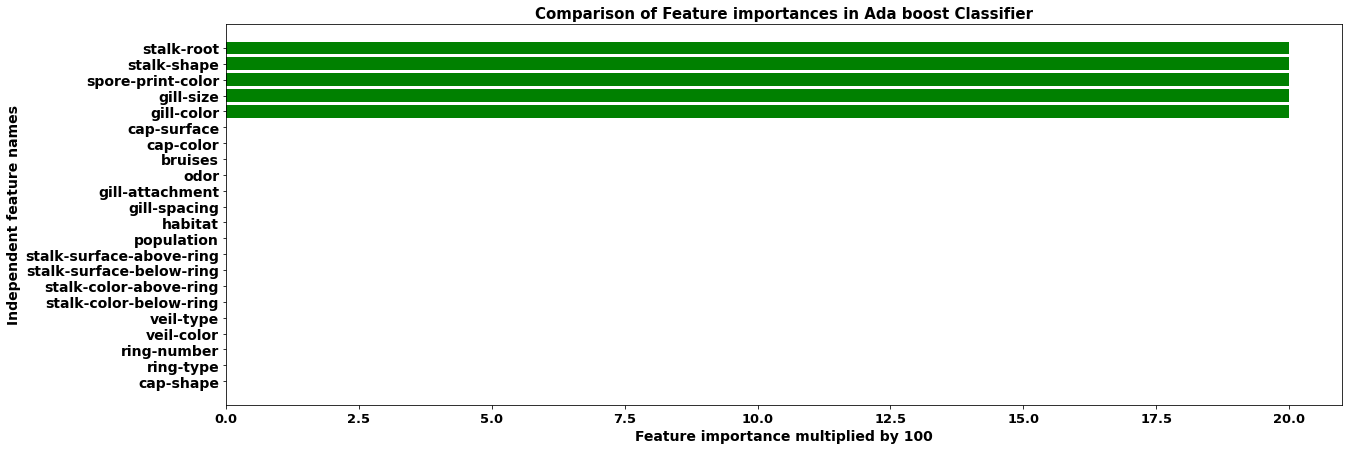

In [18]:
# Feature importances in Ada boost Classifier for independent set 'x' :
plt.figure(figsize= (20, 7))
model= ada_boost_classifier.fit(x_train, y_train)
feature_importance= model.feature_importances_
feature_importance= feature_importance * 100
sorted_index= numpy.argsort(feature_importance)
plt.barh(numpy.arange(22), feature_importance[sorted_index], color= 'green')
plt.yticks(numpy.arange(22), x.columns[sorted_index], fontsize= 14, fontweight= 'bold')
plt.xticks(fontsize= 13, fontweight= 'bold')
plt.xlabel('Feature importance multiplied by 100', fontsize= 14, fontweight= 'bold')
plt.ylabel('Independent feature names', fontsize= 14, fontweight= 'bold')
plt.title('Comparison of Feature importances in Ada boost Classifier', fontsize= 15, fontweight= 'bold')
plt.show()

In [19]:
# Gradient Boosting Regressor
gradient_boosting_regressor= GradientBoostingRegressor(max_depth= 2,  n_estimators= 5, learning_rate= 1 )
gradient_boosting_regressor.fit(x_train, y_train)
y_pred= gradient_boosting_regressor.predict(x_test)
gbr_accuracy= ( r2_score(y_test, y_pred) ) * 100
gbr_accuracy1= gbr_accuracy.round(decimals= 3)
print('Accuracy score with Gradient Boosting Regressor is : ', gbr_accuracy1, '% .')

Accuracy score with Gradient Boosting Regressor is :  86.463 % .


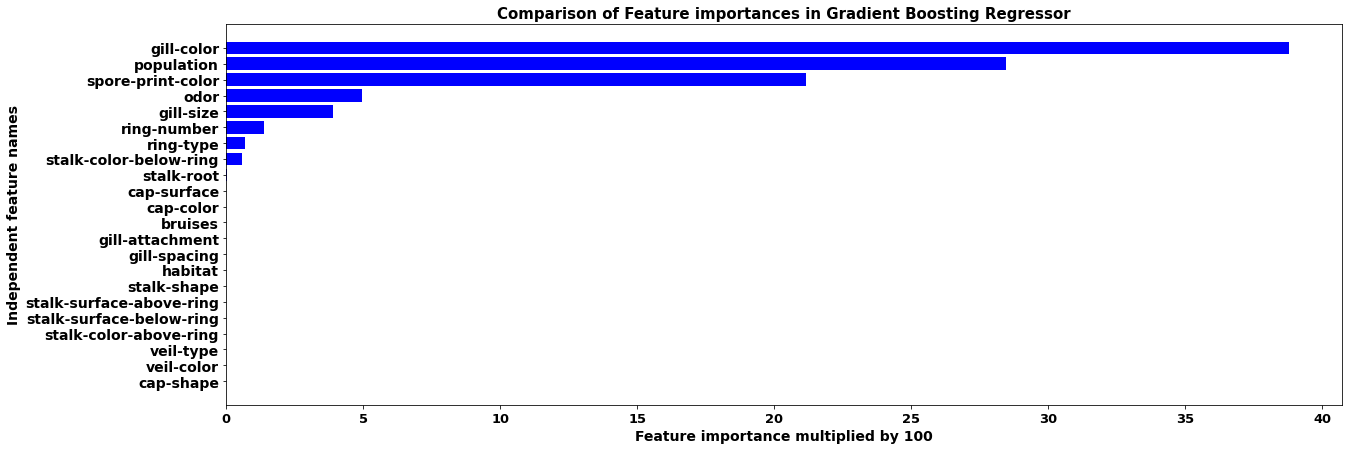

In [20]:
# Feature importances in Gradient Boosting Regressor for independent set 'x' :
plt.figure(figsize= (20, 7))
model= gradient_boosting_regressor.fit(x_train, y_train)
feature_importance= model.feature_importances_
feature_importance= feature_importance * 100
sorted_index= numpy.argsort(feature_importance)
plt.barh(numpy.arange(22), feature_importance[sorted_index], color= 'blue')
plt.yticks(numpy.arange(22), x.columns[sorted_index], fontsize= 14, fontweight= 'bold')
plt.xticks(fontsize= 13, fontweight= 'bold')
plt.xlabel('Feature importance multiplied by 100', fontsize= 14, fontweight= 'bold')
plt.ylabel('Independent feature names', fontsize= 14, fontweight= 'bold')
plt.title('Comparison of Feature importances in Gradient Boosting Regressor', fontsize= 15, fontweight= 'bold')
plt.show()

In [21]:
# Gradient Boosting Classifier
gradient_boosting_classifier= GradientBoostingClassifier(max_depth= 2,  n_estimators= 5, learning_rate= 1 )
gradient_boosting_classifier.fit(x_train, y_train)
y_pred= gradient_boosting_classifier.predict(x_test)
gbc_accuracy= ( accuracy_score(y_test, y_pred) ) * 100
gbc_accuracy1= gbc_accuracy.round(decimals= 3)
print('Accuracy score with Gradient Boosting Classifier is : ', gbc_accuracy1, '% .')
gbc_f1_score= ( f1_score(y_test, y_pred) ) * 100
gbc_f1_score1= gbc_f1_score.round(decimals= 3)
print('F1 score with Gradient Boosting Classifier is : ', gbc_f1_score1, '% .')
print('Confusion matrix is : ','\n',confusion_matrix(y_test, y_pred))
print('Classification report is : ','\n',classification_report(y_test, y_pred))

Accuracy score with Gradient Boosting Classifier is :  97.662 % .
F1 score with Gradient Boosting Classifier is :  97.619 % .
Confusion matrix is :  
 [[808  20]
 [ 18 779]]
Classification report is :  
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       828
           1       0.97      0.98      0.98       797

    accuracy                           0.98      1625
   macro avg       0.98      0.98      0.98      1625
weighted avg       0.98      0.98      0.98      1625



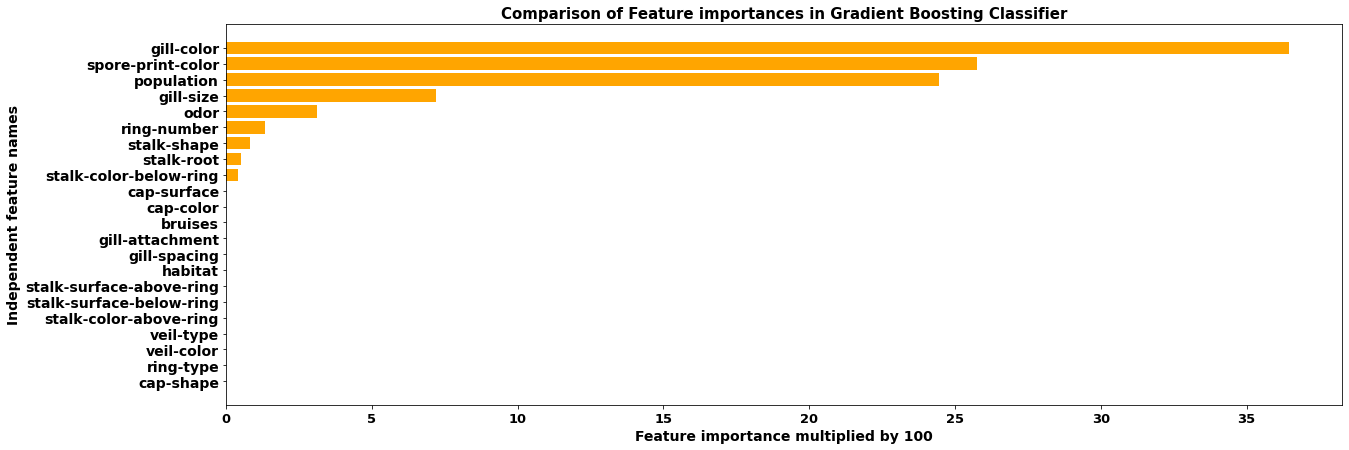

In [22]:
# Feature importances in Gradient Boosting Classifier for independent set 'x' :
plt.figure(figsize= (20, 7))
model= gradient_boosting_classifier.fit(x_train, y_train)
feature_importance= model.feature_importances_
feature_importance= feature_importance * 100
sorted_index= numpy.argsort(feature_importance)
plt.barh(numpy.arange(22), feature_importance[sorted_index], color= 'orange')
plt.yticks(numpy.arange(22), x.columns[sorted_index], fontsize= 14, fontweight= 'bold')
plt.xticks(fontsize= 13, fontweight= 'bold')
plt.xlabel('Feature importance multiplied by 100', fontsize= 14, fontweight= 'bold')
plt.ylabel('Independent feature names', fontsize= 14, fontweight= 'bold')
plt.title('Comparison of Feature importances in Gradient Boosting Classifier', fontsize= 15, fontweight= 'bold')
plt.show()

In [23]:
# XG Boost Classifier
xg_b_classifier= XGBClassifier(max_depth= 2,  n_estimators= 5, learning_rate= 1 )
xg_b_classifier.fit(x_train, y_train)
y_pred= xg_b_classifier.predict(x_test)
xgb_accuracy= ( accuracy_score(y_test, y_pred) ) * 100
xgb_accuracy1= xgb_accuracy.round(decimals= 3)
print('Accuracy score with XG Boost Classifier is : ', xgb_accuracy1, '% .')
xgb_f1_score= ( f1_score(y_test, y_pred) ) * 100
xgb_f1_score1= xgb_f1_score.round(decimals= 3)
print('F1 score with XG Boost Classifier is : ', xgb_f1_score1, '% .')
print('Confusion matrix is : ','\n',confusion_matrix(y_test, y_pred))
print('Classification report is : ','\n',classification_report(y_test, y_pred))

Accuracy score with XG Boost Classifier is :  98.585 % .
F1 score with XG Boost Classifier is :  98.549 % .
Confusion matrix is :  
 [[821   7]
 [ 16 781]]
Classification report is :  
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       828
           1       0.99      0.98      0.99       797

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625



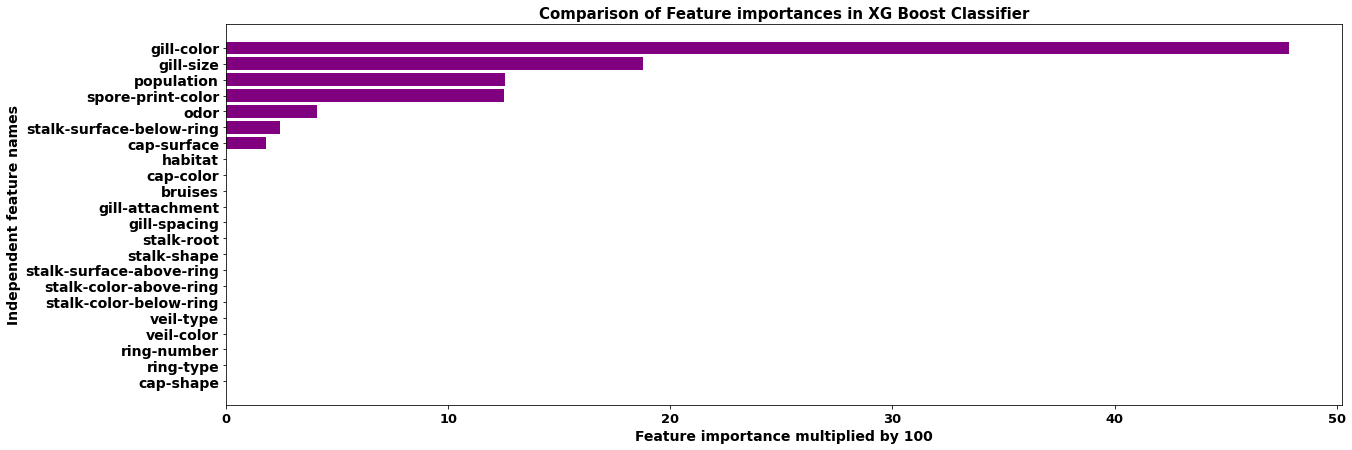

In [24]:
# Feature importances in XG Boost Classifier for independent set 'x' :
plt.figure(figsize= (20, 7))
model= xg_b_classifier.fit(x_train, y_train)
feature_importance= model.feature_importances_
feature_importance= feature_importance * 100
sorted_index= numpy.argsort(feature_importance)
plt.barh(numpy.arange(22), feature_importance[sorted_index], color= 'purple')
plt.yticks(numpy.arange(22), x.columns[sorted_index], fontsize= 14, fontweight= 'bold')
plt.xticks(fontsize= 13, fontweight= 'bold')
plt.xlabel('Feature importance multiplied by 100', fontsize= 14, fontweight= 'bold')
plt.ylabel('Independent feature names', fontsize= 14, fontweight= 'bold')
plt.title('Comparison of Feature importances in XG Boost Classifier', fontsize= 15, fontweight= 'bold')
plt.show()

In [25]:
# Cat Boost Classifier
cat_b_classifier= CatBoostClassifier( max_depth= 2,  n_estimators= 5, learning_rate= 1 , eval_metric= 'F1')
cat_b_classifier.fit(x_train, y_train)
y_pred= cat_b_classifier.predict(x_test)
catb_accuracy= ( accuracy_score(y_test, y_pred) ) * 100
catb_accuracy1= catb_accuracy.round(decimals= 3)
print('Accuracy score with Cat Boost Classifier is : ', catb_accuracy1, '% .')
catb_f1_score= ( f1_score(y_test, y_pred) ) * 100
catb_f1_score1= catb_f1_score.round(decimals= 3)
print('F1 score with Cat Boost Classifier is : ', catb_f1_score1, '% .')
print('Confusion matrix is : ','\n',confusion_matrix(y_test, y_pred))
print('Classification report is : ','\n',classification_report(y_test, y_pred))

0:	learn: 0.9036021	total: 51.2ms	remaining: 205ms
1:	learn: 0.9455975	total: 54.6ms	remaining: 81.9ms
2:	learn: 0.9556852	total: 57.3ms	remaining: 38.2ms
3:	learn: 0.9588050	total: 60ms	remaining: 15ms
4:	learn: 0.9641107	total: 62.7ms	remaining: 0us
Accuracy score with Cat Boost Classifier is :  96.738 % .
F1 score with Cat Boost Classifier is :  96.71 % .
Confusion matrix is :  
 [[793  35]
 [ 18 779]]
Classification report is :  
               precision    recall  f1-score   support

           0       0.98      0.96      0.97       828
           1       0.96      0.98      0.97       797

    accuracy                           0.97      1625
   macro avg       0.97      0.97      0.97      1625
weighted avg       0.97      0.97      0.97      1625



0:	learn: 0.9036021	total: 3.05ms	remaining: 12.2ms
1:	learn: 0.9455975	total: 6.41ms	remaining: 9.62ms
2:	learn: 0.9556852	total: 9.61ms	remaining: 6.4ms
3:	learn: 0.9588050	total: 12.4ms	remaining: 3.1ms
4:	learn: 0.9641107	total: 15ms	remaining: 0us


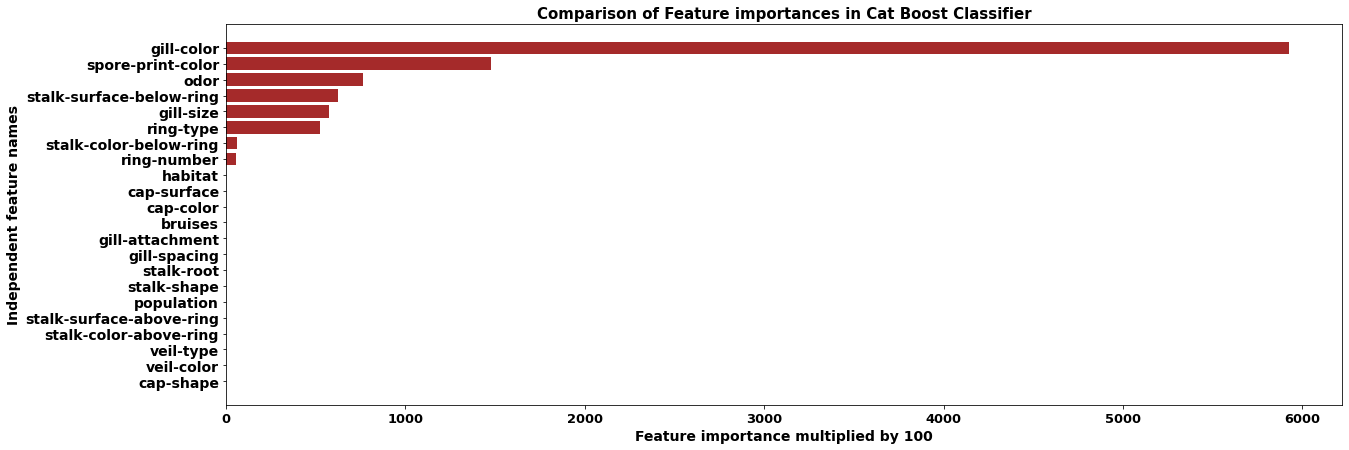

In [26]:
# Feature importances in Cat Boost Classifier for independent set 'x' :
plt.figure(figsize= (20, 7))
model= cat_b_classifier.fit(x_train, y_train)
feature_importance= model.feature_importances_
feature_importance= feature_importance * 100
sorted_index= numpy.argsort(feature_importance)
plt.barh(numpy.arange(22), feature_importance[sorted_index], color= 'brown')
plt.yticks(numpy.arange(22), x.columns[sorted_index], fontsize= 14, fontweight= 'bold')
plt.xticks(fontsize= 13, fontweight= 'bold')
plt.xlabel('Feature importance multiplied by 100', fontsize= 14, fontweight= 'bold')
plt.ylabel('Independent feature names', fontsize= 14, fontweight= 'bold')
plt.title('Comparison of Feature importances in Cat Boost Classifier', fontsize= 15, fontweight= 'bold')
plt.show()

In [27]:
# Comparing different classifiers
df= pandas.DataFrame({'Classifier names': ['Linear Regression', 'Decision tree classifier', 'Ada boost Classifier',
                                           'Gradient Boosting Regressor', 'Gradient Boosting Classifier',
                                           'XG Boost Classifier', 'Cat Boost Classifier'], 'Accuracy scores': [lr_accuracy1, dtc_accuracy1,
                                                                                      ada_accuracy1, gbr_accuracy1,
                                                                                      gbc_accuracy1, xgb_accuracy1, catb_accuracy1], 'F1 scores': [0, 
                        dtc_f1_score1, adab_f1_score1, 0, gbc_f1_score1, xgb_f1_score1, catb_f1_score1]})
df

,Classifier names,Accuracy scores,F1 scores
0,Linear Regression,72.845,0.000
1,Decision tree classifier,71.692,59.436
2,Ada boost Classifier,95.508,95.435
3,Gradient Boosting Regressor,86.463,0.000
4,Gradient Boosting Classifier,97.662,97.619
5,XG Boost Classifier,98.585,98.549
6,Cat Boost Classifier,96.738,96.710


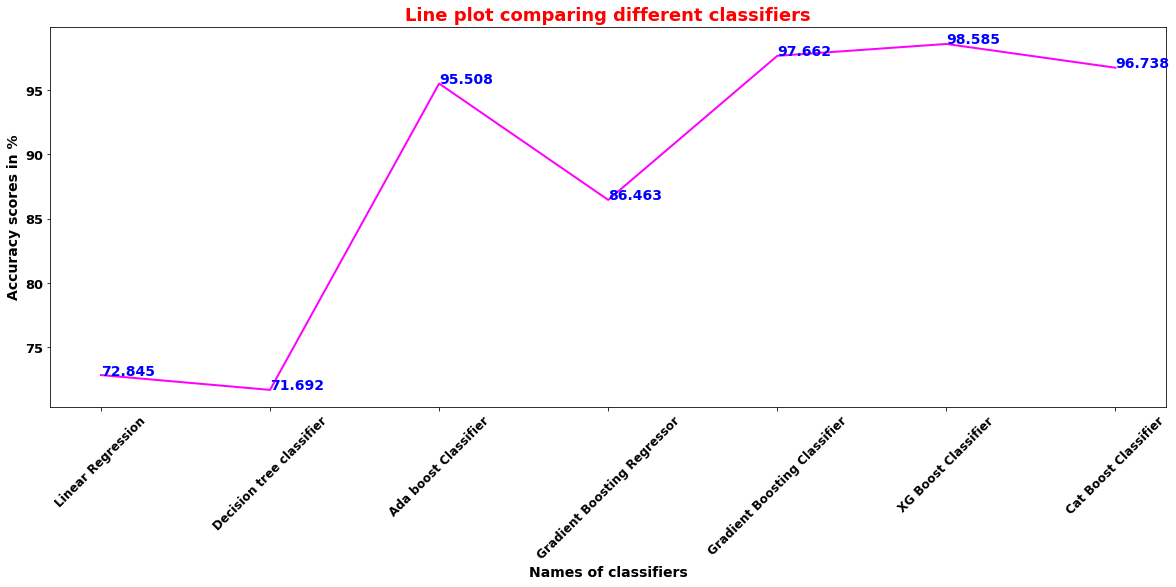

In [28]:
# Line plot
plt.figure(figsize= (20, 7))
plt.plot(df['Classifier names'], df['Accuracy scores'], color= 'magenta', linewidth= 2)
plt.xticks(fontsize= 12, fontweight= 'bold', rotation= 45)
plt.yticks(fontsize= 13, fontweight= 'bold')
plt.xlabel('Names of classifiers', fontsize= 14, fontweight= 'bold')
plt.ylabel('Accuracy scores in %', fontsize= 14, fontweight= 'bold')
plt.title('Line plot comparing different classifiers', fontsize= 18, fontweight= 'bold', color= 'Red' )
for x, y in zip(df['Classifier names'], df['Accuracy scores']):
                plt.text(x, y, str(y), fontsize= 14, fontweight= 'bold', color= 'blue')
plt.show()

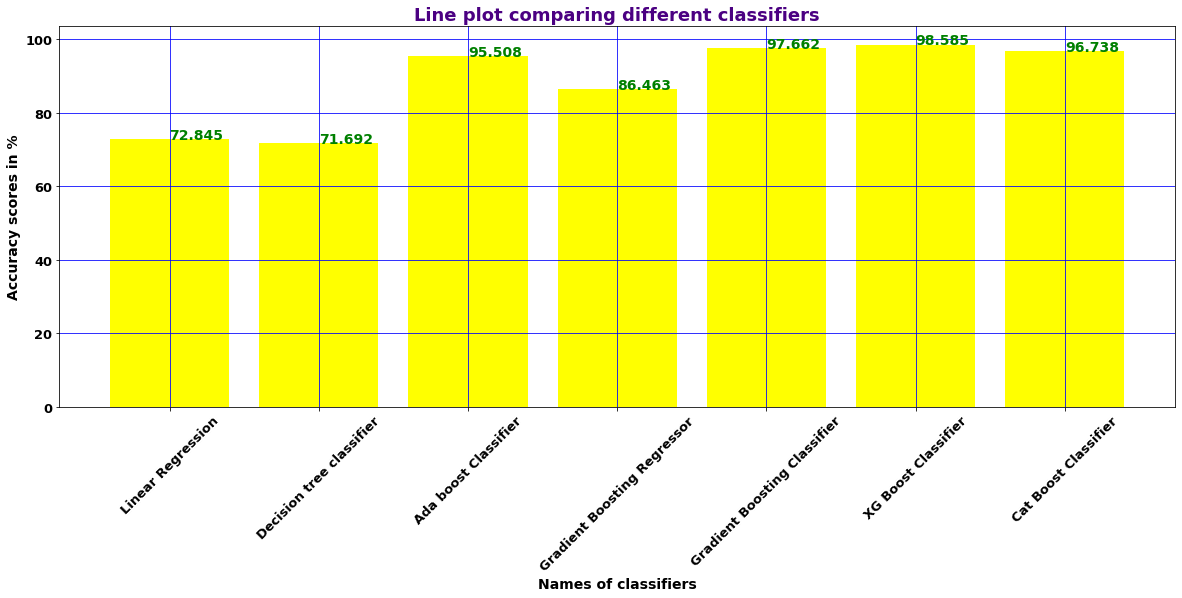

In [29]:
# Bar plot
plt.figure(figsize= (20, 7))
plt.bar(df['Classifier names'], df['Accuracy scores'], color= 'yellow', linewidth= 2)
plt.xticks(fontsize= 13, fontweight= 'bold', rotation= 45)
plt.yticks(fontsize= 13, fontweight= 'bold')
plt.xlabel('Names of classifiers', fontsize= 14, fontweight= 'bold')
plt.ylabel('Accuracy scores in %', fontsize= 14, fontweight= 'bold')
plt.title('Line plot comparing different classifiers', fontsize= 18, fontweight= 'bold', color= 'indigo' )
for x, y in zip(df['Classifier names'], df['Accuracy scores']):
                plt.text(x, y, str(y), fontsize= 14, fontweight= 'bold', color= 'green')
plt.grid(color= 'blue')
plt.show()

In [30]:
top= df['Accuracy scores'].idxmax()
top_classifier = df['Classifier names'][top]
bottom= df['Accuracy scores'].idxmin()
bottom_classifier = df['Classifier names'][bottom]

top1= df['F1 scores'].idxmax()
top_classifier1 = df['Classifier names'][top1]

In [31]:
 from termcolor import colored
print(colored('I am getting highest accuracy score for : ', 'green', attrs= ['bold']), top_classifier)
print(colored('I am getting lowest accuracy score for : ', 'red', attrs= ['bold']), bottom_classifier)
print(colored('I am getting highest F1 score for : ', 'green', attrs= ['bold']), top_classifier1)

I am getting highest accuracy score for :  XG Boost Classifier
I am getting lowest accuracy score for :  Decision tree classifier
I am getting highest F1 score for :  XG Boost Classifier
